# Modelos de ML

En esta sección se cargaran todos los datos que han sido transformados y limpiados para realizar feature engineering, optimización de hiperparametros y reducción de dimensionalidad.

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 100)

## Carga de los datos

In [96]:
df = pd.read_csv("dataClean_new.csv", sep = ",")

In [120]:
df.head()

,genero,ind_mora_vigente,cartera_castigada,rechazo_credito,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,tenencia_tc,tiene_consumo,tiene_crediagil,tiene_ctas_activas,tiene_ctas_embargadas,mediana_nom3,mediana_pen3,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,saldo_prom3_tdc_mdo,saldo_no_rot_mdo,cant_oblig_tot_sf,ind,gasto_familiar,edad_X,edad_Y,edad_Z,estado_civil_divorciado,estado_civil_otro,estado_civil_soltero,estado_civil_union libre,estado_civil_viudo,nivel_academico_especializacion,nivel_academico_ninguno,nivel_academico_primario,nivel_academico_sin informacion,nivel_academico_tecnologo,nivel_academico_universitario,ocupacion_ama de casa,ocupacion_comerciante,ocupacion_desempleado con ingresos,ocupacion_desempleado sin ingresos,ocupacion_empleado,ocupacion_estudiante,ocupacion_ganadero,ocupacion_independiente,ocupacion_jubilado,ocupacion_otro,ocupacion_pensionado,ocupacion_profesional independiente,ocupacion_rentista de capital,ocupacion_socio empleado - socio,tipo_vivienda_familiar,tipo_vivienda_no informa,tipo_vivienda_propia,categoria_2,categoria_3,categoria_4,categoria_5,rep_calif_cred_B,rep_calif_cred_C,rep_calif_cred_D,rep_calif_cred_E,rep_calif_cred_F,rep_calif_cred_G,rep_calif_cred_H,cuotas_a_pagar,ingresos_POC
0,1,0,0,0,0,0,0,0,0,0,1,0,1255032.00000,0.00000,1391032.00000,0,0,0.00000,0.00000,0.00000,695516.00000,304687.00000,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.00000,2510064.00000
1,1,0,0,0,0,0,0,0,0,0,1,0,0.00000,0.00000,1484205.00000,0,0,0.00000,2555000.00000,0.00000,210681.47500,1056864.00000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,524000.00000,1484205.00000
2,0,0,0,0,0,0,0,0,1,0,1,0,4353538.00000,0.00000,4353334.00000,0,0,16242500.00000,211000.00000,4.00000,1615755.80000,248386.00000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2182578.00000,12207076.00000
3,1,0,0,0,0,0,0,0,0,0,1,0,0.00000,0.00000,2151668.74000,0,0,0.00000,54302000.00000,1.00000,43351.05740,234671.00000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2108000.00000,0.00000
4,1,0,0,0,0,0,0,0,0,0,1,0,0.00000,1918483.00000,3532000.00000,0,0,0.00000,64569000.00000,4.00000,423540.00000,1091384.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1678000.00000,1918483.00000


In [98]:
df1 = df.sample(frac=0.40)
df1["cant_oblig_tot_sf"] = df1["cant_oblig_tot_sf"].astype(np.int64)

In [99]:
numerical = df1.select_dtypes(include=['float64'])
numerical = numerical.drop(["gasto_familiar"], axis = 1)

In [100]:
col_names = numerical.columns

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(numerical)
scaled = sc.transform(numerical)

In [102]:
scaled

array([[-0.50906316,  1.37897706, -0.5132396 , ..., -0.14752533,
        -0.26683252, -0.33852219],
       [-0.50906316,  5.75925047,  0.88454479, ...,  0.31157934,
         0.17609667,  0.41506567],
       [ 1.01882691, -0.19575543, -0.02220436, ...,  0.01472877,
        -0.22896902,  0.07933675],
       ...,
       [-0.50906316, -0.19575543, -0.28297468, ..., -0.14897309,
        -0.19147432, -0.60944119],
       [ 6.80790287, -0.19575543,  2.97867501, ...,  0.77521605,
         0.63722001,  2.68907153],
       [ 0.85493156, -0.19575543, -0.23612887, ...,  1.51943535,
         2.06509193,  0.51762596]])

In [103]:
num = pd.DataFrame(data=scaled, 
                  columns=col_names)

In [104]:
num

,mediana_nom3,mediana_pen3,ingreso_final,saldo_prom3_tdc_mdo,saldo_no_rot_mdo,ind,cuotas_a_pagar,ingresos_POC
0,-0.509063,1.378977,-0.513240,-0.328144,-0.352546,-0.147525,-0.266833,-0.338522
1,-0.509063,5.759250,0.884545,0.321004,0.016019,0.311579,0.176097,0.415066
2,1.018827,-0.195755,-0.022204,-0.328144,-0.122190,0.014729,-0.228969,0.079337
3,-0.509063,-0.195755,-0.300911,-0.328144,-0.352546,-0.093400,-0.266833,-0.609441
4,-0.509063,0.563407,-0.635691,-0.328144,-0.352546,-0.177749,-0.266833,-0.478834
...,...,...,...,...,...,...,...,...
152308,-0.509063,-0.195755,-0.363067,-0.328144,-0.352546,-0.146889,-0.219134,-0.609441
152309,1.559661,-0.195755,1.071349,-0.272704,-0.352546,0.186989,-0.168855,2.970815
152310,-0.509063,-0.195755,-0.282975,-0.328144,-0.267118,-0.148973,-0.191474,-0.609441
152311,6.807903,-0.195755,2.978675,2.043278,0.346651,0.775216,0.637220,2.689072


In [105]:
for col in col_names:
    df1[col] = num[col]    

df1 = df1.fillna(0)

## Selección de modelos

Para este analisis se realizaran las comparaciones de performance utilizando 3 modelos:

1. Gradient Boosting tree
2. Random Forest
3. Support vector machine
4. Neural networks

In [106]:
X = df1.drop(["gasto_familiar"], axis = 1)
Y = df1["gasto_familiar"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=7)

## Modelo sencillo para analisis de features importances

In [108]:
from sklearn.linear_model import ElasticNetCV

ENReg = ElasticNetCV(random_state = 0, verbose = 2)
ENReg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Path: 000 out of 100
Path: 001 out of 100
Path: 002 out of 100
Path: 003 out of 100
Path: 004 out of 100
Path: 005 out of 100
Path: 006 out of 100
Path: 007 out of 100
Path: 008 out of 100
Path: 009 out of 100
Path: 010 out of 100
Path: 011 out of 100
Path: 012 out of 100
Path: 013 out of 100
Path: 014 out of 100
Path: 015 out of 100
Path: 016 out of 100
Path: 017 out of 100
Path: 018 out of 100
Path: 019 out of 100
Path: 020 out of 100
Path: 021 out of 100
Path: 022 out of 100
Path: 023 out of 100
Path: 024 out of 100
Path: 025 out of 100
Path: 026 out of 100
Path: 027 out of 100
Path: 028 out of 100
Path: 029 out of 100
Path: 030 out of 100
Path: 031 out of 100
Path: 032 out of 100
Path: 033 out of 100
Path: 034 out of 100
Path: 035 out of 100
Path: 036 out of 100
Path: 037 out of 100
Path: 038 out of 100
Path: 039 out of 100
Path: 040 out of 100
Path: 041 out of 100
Path: 042 out of 100
Path: 043 out of 100
Path: 044 out of 100
Path: 045 out of 100
Path: 046 out of 100
Path: 047 out

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


Path: 000 out of 100
Path: 001 out of 100
Path: 002 out of 100
Path: 003 out of 100
Path: 004 out of 100
Path: 005 out of 100
Path: 006 out of 100
Path: 007 out of 100
Path: 008 out of 100
Path: 009 out of 100
Path: 010 out of 100
Path: 011 out of 100
Path: 012 out of 100
Path: 013 out of 100
Path: 014 out of 100
Path: 015 out of 100
Path: 016 out of 100
Path: 017 out of 100
Path: 018 out of 100
Path: 019 out of 100
Path: 020 out of 100
Path: 021 out of 100
Path: 022 out of 100
Path: 023 out of 100
Path: 024 out of 100
Path: 025 out of 100
Path: 026 out of 100
Path: 027 out of 100
Path: 028 out of 100
Path: 029 out of 100
Path: 030 out of 100
Path: 031 out of 100
Path: 032 out of 100
Path: 033 out of 100
Path: 034 out of 100
Path: 035 out of 100
Path: 036 out of 100
Path: 037 out of 100
Path: 038 out of 100
Path: 039 out of 100
Path: 040 out of 100
Path: 041 out of 100
Path: 042 out of 100
Path: 043 out of 100
Path: 044 out of 100
Path: 045 out of 100
Path: 046 out of 100
Path: 047 out

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


ElasticNetCV(random_state=0, verbose=2)

In [109]:
ENReg.score(X_test, y_test)

0.001545166340732318

In [110]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = ENReg.predict(X_test)

In [111]:
def mean_absolute_percentage_error2(y_pred, y_true):
    y_true = np.where(y_true == 0, 0.0000000001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [116]:
#mape = mean_absolute_percentage_error(y_test, y_pred)*100
mape = mean_absolute_percentage_error2(y_pred, y_test)*100
mape

123.79741100394955

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1500, 'max_depth': 5, 'verbose': 2}

#GBReg = GradientBoostingRegressor(**params).fit(X_train, y_train)

In [31]:
GBReg.score(X_test, y_test)

0.056888728450882775

In [32]:
y_pred2 = GBReg.predict(X_test)

In [90]:
map2 = mean_absolute_percentage_error(y_test, y_pred2)*100
map2

127.04553365165172

In [18]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

regr = SVR(C=1.0, epsilon=0.2, verbose=True)
regr.fit(X_train, y_train)

[LibSVM]..........................................................
*
optimization finished, #iter = 58690
obj = -33580346579.851971, rho = -425483.502909
nSV = 106618, nBSV = 106618


SVR(epsilon=0.2, verbose=True)

In [19]:
regr.score(X_test, y_test)

-0.08162571350512304

In [117]:
y_pred3 = regr.predict(X_test)

In [118]:
#map2 = mean_absolute_percentage_error2(y_pred2, y_test)*100
map2 = mean_absolute_percentage_error(y_test, y_pred2)*100
map2

126.98194721273998

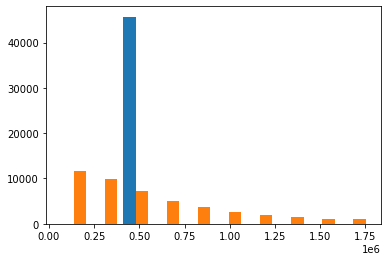

In [123]:
plt.hist([y_pred3,y_test]);

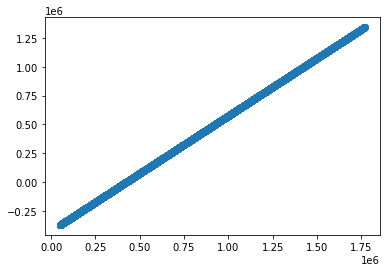

In [128]:
residuals = y_test - y_pred3
plt.scatter(y_test,residuals)

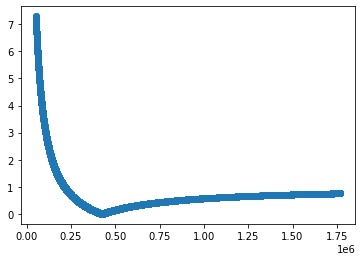

In [129]:
ap_residuals = np.abs(residuals) / y_test
plt.scatter(y_test,ap_residuals);

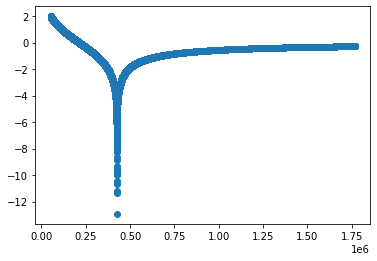

In [130]:
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test,lap_residuals)

AttributeError: 'Polygon' object has no property 'normed'

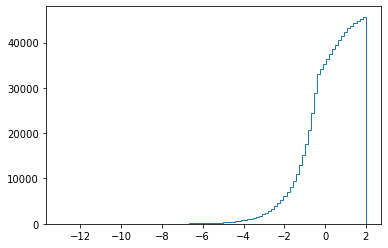

In [131]:
plt.hist(lap_residuals,bins=100, normed=1, histtype='step', cumulative=True);

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes = (380,240,120,60), 
                    random_state=1, 
                    max_iter=500,
                    verbose = True).fit(X_train, y_train)

Iteration 1, loss = 108259917095.82127380
Iteration 2, loss = 79668758420.13568115
Iteration 3, loss = 79225780361.65188599
Iteration 4, loss = 79030611524.44477844
Iteration 5, loss = 78894064643.49644470
Iteration 6, loss = 78762859189.72418213
Iteration 7, loss = 78681673389.42340088
Iteration 8, loss = 78691094880.92755127
Iteration 9, loss = 78603470141.54710388
Iteration 10, loss = 78635787105.70980835
Iteration 11, loss = 78560644004.60424805
Iteration 12, loss = 78539191827.68353271
Iteration 13, loss = 78563777022.95912170
Iteration 14, loss = 78525160878.13995361
Iteration 15, loss = 78515393110.38204956
Iteration 16, loss = 78501839501.32563782
Iteration 17, loss = 78513084218.20605469
Iteration 18, loss = 78511534831.85787964
Iteration 19, loss = 78519967458.26759338
Iteration 20, loss = 78491116570.99938965
Iteration 21, loss = 78493292489.38098145
Iteration 22, loss = 78501881285.18641663
Iteration 23, loss = 78489269773.87532043
Iteration 24, loss = 78528119527.77000427


In [ ]:
y_pred4 = regr.predict(X_test)

In [ ]:
regr.score(X_test, y_test)

In [ ]:
plt.hist([y_pred4,y_test]);

In [ ]:
mape_nn = mean_absolute_percentage_error2(y_pred4, y_test)

In [ ]:
mape_nn